# Regresión - Optimizar y guardar modelos

En el cuaderno anterior, usamos modelos de regresión complejos para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este portátil, veremos si podemos mejorar aún más el rendimiento de estos modelos.

Comencemos cargando los datos de uso compartido de bicicletas como un DataFrame de **Pandas** y viendo las primeras filas. Como de costumbre, también dividiremos nuestros datos en conjuntos de datos de entrenamiento y prueba.

In [2]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset

import wget
enlace = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv'
wget.download(enlace)

bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


100% [..............................................................................] 48800 / 48800   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: los valores de características que usaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test**: Los valores de característica que usaremos para validar el modelo
- **y_test**: Las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de conjunto *impulsador*, como en nuestro último cuaderno. Recuerde que un estimador de aumento de gradiente es como un algoritmo de bosque aleatorio, pero en lugar de construir todos los árboles de forma independiente y tomar el resultado promedio, cada árbol se construye sobre los resultados del anterior en un intento de reducir gradualmente la *pérdida* ( error) en el modelo.

GradientBoostingRegressor() 

MSE: 104458.8137930698
RMSE: 323.20088767370333
R2: 0.7952150517743494


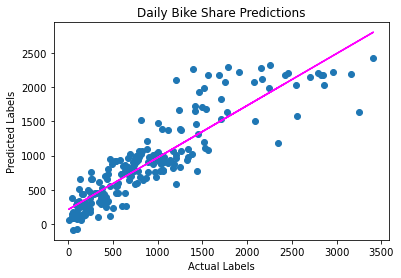

In [3]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimizar hiperparámetros

Eche un vistazo a la definición del estimador **GradientBoostingRegressor** en el resultado anterior y tenga en cuenta que, al igual que los otros estimadores que probamos anteriormente, incluye una gran cantidad de parámetros que controlan la forma en que se entrena el modelo. En aprendizaje automático, el término *parámetros* se refiere a valores que se pueden determinar a partir de datos; los valores que especifica para afectar el comportamiento de un algoritmo de entrenamiento se denominan más correctamente *hiperparámetros*.

Los hiperparámetros específicos para un estimador varían según el algoritmo que encapsula el estimador. En el caso del estimador **GradientBoostingRegressor**, el algoritmo es un conjunto que combina varios árboles de decisión para crear un modelo predictivo general. Puede obtener información sobre los hiperparámetros para este estimador en la [documentación de Scikit-Learn] (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

No entraremos en los detalles de cada hiperparámetro aquí, pero trabajan juntos para afectar la forma en que el algoritmo entrena un modelo. En muchos casos, los valores predeterminados proporcionados por Scikit-Learn funcionarán bien; pero puede haber alguna ventaja en la modificación de los hiperparámetros para obtener un mejor rendimiento predictivo o reducir el tiempo de entrenamiento.

Entonces, ¿cómo sabe qué valores de hiperparámetro debe usar? Bueno, en ausencia de una comprensión profunda de cómo funciona el algoritmo subyacente, deberá experimentar. Afortunadamente, SciKit-Learn ofrece una manera de *ajustar* los hiperparámetros probando múltiples combinaciones y encontrando el mejor resultado para una métrica de rendimiento determinada.

Intentemos usar un enfoque de *búsqueda en cuadrícula* para probar combinaciones de una cuadrícula de valores posibles para los hiperparámetros **learning_rate** y **n_estimators** del estimador **GradientBoostingRegressor**.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 103981.79598016485
RMSE: 322.4620845621464
R2: 0.796150215257174


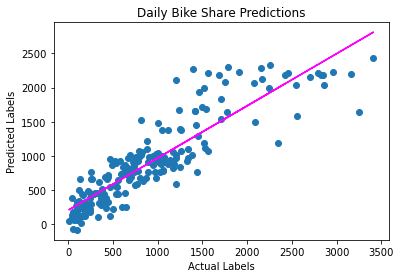

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

> **Nota**: El uso de valores aleatorios en el algoritmo Gradient Boost da como resultado métricas ligeramente diferentes cada vez. En este caso, es poco probable que el mejor modelo producido por el ajuste de hiperparámetros sea significativamente mejor que uno entrenado con los valores predeterminados de hiperparámetros; ¡pero sigue siendo útil conocer la técnica de ajuste de hiperparámetros!

## Preprocesar los datos

Entrenamos un modelo con datos que se cargaron directamente desde un archivo de origen, con resultados solo moderadamente exitosos.

En la práctica, es común realizar algún preprocesamiento de los datos para que sea más fácil para el algoritmo ajustar un modelo a ellos. Hay una gran variedad de transformaciones de preprocesamiento que puede realizar para preparar sus datos para el modelado, pero nos limitaremos a algunas técnicas comunes:

### Escalado de características numéricas

La normalización de las características numéricas para que estén en la misma escala evita que las características con valores grandes produzcan coeficientes que afecten de manera desproporcionada a las predicciones. Por ejemplo, suponga que sus datos incluyen las siguientes características numéricas:

| un | B | C |
| - | --- | --- |
| 3 | 480 | 65 |
    
La normalización de estas características a la misma escala puede dar como resultado los siguientes valores (suponiendo que A contiene valores de 0 a 10, B contiene valores de 0 a 1000 y C contiene valores de 0 a 100):

| un | B | C |
| -- | --- | --- |
| 0.3 | 0.48| 0.65|

Hay varias formas de escalar datos numéricos, como calcular los valores mínimo y máximo para cada columna y asignar un valor proporcional entre 0 y 1, o usar la media y la desviación estándar de una variable normalmente distribuida para mantener la misma *spread * de valores en una escala diferente.

### Codificación de variables categóricas

Los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto, por lo que generalmente necesita convertir características categóricas en representaciones numéricas. Por ejemplo, suponga que sus datos incluyen la siguiente característica categórica.

| Tamaño |
| ---- |
| S |
| m |
| L |

Puede aplicar *codificación ordinal* para sustituir un valor entero único para cada categoría, así:

| Tamaño |
| ---- |
| 0 |
| 1 |
| 2 |

Otra técnica común es usar *una codificación en caliente* para crear características binarias individuales (0 o 1) para cada valor de categoría posible. Por ejemplo, podría usar la codificación one-hot para traducir las posibles categorías en columnas binarias como esta:

| Talla_S | Talla_M | Talla_L |
| ------- | -------- | -------- |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

Para aplicar estas transformaciones de preprocesamiento al alquiler de bicicletas, utilizaremos una característica de Scikit-Learn denominada *tuberías*. Estos nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. A continuación, puede ajustar toda la canalización a los datos, de modo que el modelo encapsule todos los pasos de preprocesamiento, así como el algoritmo de regresión. Esto es útil, porque cuando queremos usar el modelo para predecir valores a partir de datos nuevos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías que se usan con los datos de entrenamiento).

>**Nota**: El término *canalización* se usa ampliamente en el aprendizaje automático, ¡a menudo con significados muy diferentes! En este contexto, lo usamos para referirnos a objetos de canalización en Scikit-Learn, pero es posible que vea que se usa en otros lugares para significar otra cosa.

In [5]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


Bien, el modelo está entrenado, incluidos los pasos de preprocesamiento. Veamos cómo se comporta con los datos de validación.

MSE: 105868.19505204275
RMSE: 325.37393111932425
R2: 0.7924520482740346


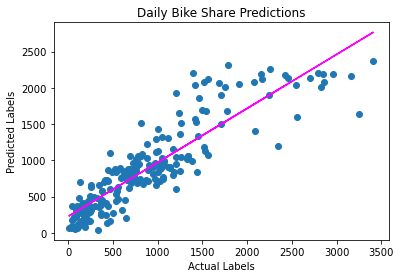

In [7]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

La canalización se compone de las transformaciones y el algoritmo utilizado para entrenar el modelo. Para probar un algoritmo alternativo, simplemente puede cambiar ese paso a un tipo diferente de estimador.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 106318.87145318183
RMSE: 326.06574713266315
R2: 0.791568525475694


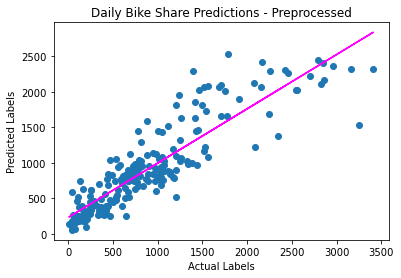

In [8]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ahora hemos visto una serie de técnicas comunes que se utilizan para entrenar modelos predictivos para la regresión. En un proyecto real, probablemente probaría algunos algoritmos, hiperparámetros y transformaciones de preprocesamiento más; pero a estas alturas ya deberías tener la idea general. Exploremos cómo puede usar el modelo entrenado con nuevos datos.

### Usar el modelo entrenado

Primero, guardemos el modelo.

In [10]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Ahora, podemos cargarlo cuando lo necesitemos y usarlo para predecir etiquetas para nuevos datos. Esto a menudo se llama *puntuación* o *inferencia*.

In [14]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 111 rentals


El método **predecir** del modelo acepta una matriz de observaciones, por lo que puede usarlo para generar múltiples predicciones como un lote. Por ejemplo, suponga que tiene un pronóstico del tiempo para los próximos cinco días; podría usar el modelo para predecir los alquileres de bicicletas para cada día en función de las condiciones climáticas esperadas.

In [16]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
600.0
782.0
224.0
195.0
259.0


## Summary

That concludes the notebooks for this module on regression. In this notebook we ran a complex regression, tuned it, saved the model, and used it to predict outcomes for the future.

## Further Reading

To learn more about Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/user_guide.html).
